<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [19]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [20]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [21]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [22]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [23]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

<class 'urllib.error.URLError'>: <urlopen error [Errno 23] Host is unreachable>

In [24]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Q1) Median of owner occupied homes

Text(0.5, 1.0, 'Median of owner occupied homes')

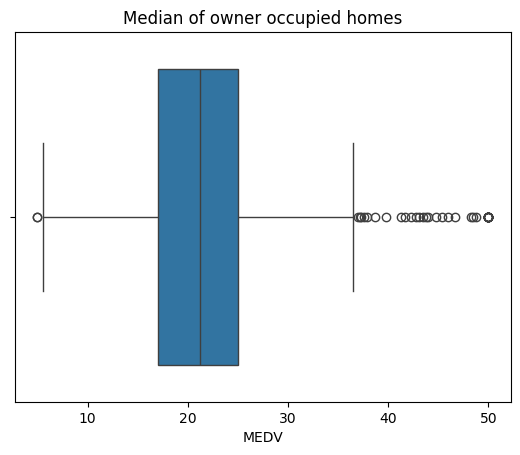

In [25]:
#Visualization using box plot
sns.boxplot(x=boston_df['MEDV']).set_title("Median of owner occupied homes")

In [26]:
print("The median value for owner owned homes is",boston_df['MEDV'].median(),".There are many outliers.")

The median value for owner owned homes is 21.2 .There are many outliers.


# Q2) Provide a  bar plot for the Charles river variable

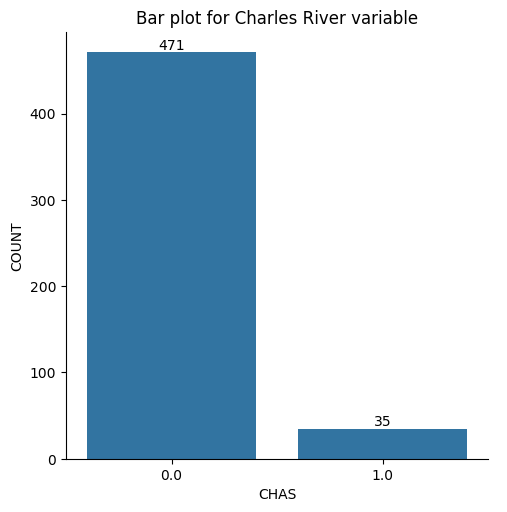

In [27]:
graph=sns.catplot(x=boston_df['CHAS'],kind="count").set(title="Bar plot for Charles River variable")
pyplot.xlabel("CHAS")
pyplot.ylabel("COUNT")
for ax in graph.axes.flat:
    ax.bar_label(ax.containers[0])

The barplot of Charles River variable above shows that 471 homes are bounded by river compared to 35 homes which are not bounded by river.

# Q3) Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [28]:
boston_df.loc[(boston_df['AGE']<=35),'age_group']="35 years and younger"
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70),'age_group']="between 35 and 70 years"
boston_df.loc[(boston_df['AGE']>=70),'age_group']="70 years and older"

[Text(0.5, 1.0, 'MEDV vs AGE')]

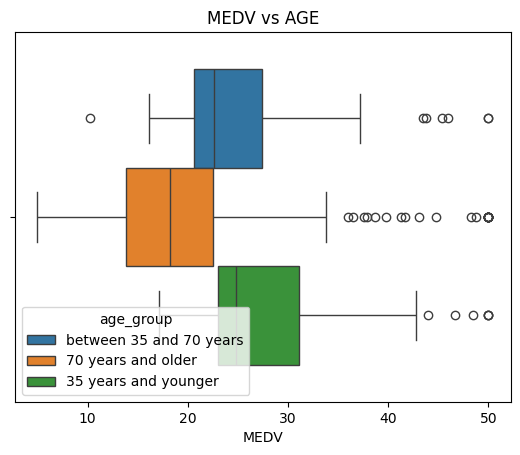

In [29]:
sns.boxplot(x='MEDV',hue='age_group',data=boston_df).set(title="MEDV vs AGE")

The least median value is for the age group 70 years and older buildings while the highest median value is for 35 years and younger buildings.There are more outliers in the 70 years and older data as well.

We can also note that for the age group 35 years and younger and between 35 years and 70 years, the data is skewed towards right(as median is closer to Q1) while the distribution for the age group of 70 years and older seems to be normal. 

# Q4) Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

[Text(0.5, 1.0, 'Relationship between NOX and INDUS')]

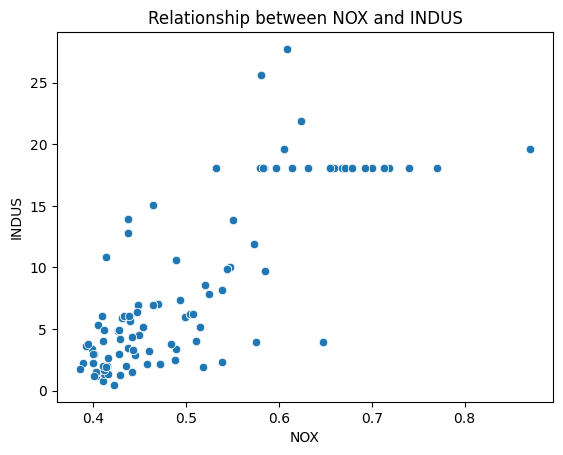

In [30]:
sns.scatterplot(x='NOX',y='INDUS',data=boston_df).set(title='Relationship between NOX and INDUS')

From the above scatter plot, we can say that Nitric Oxide concentrations and propotion of non retail acres per town has a strong positive correlation as the points are clustered and in positive direction.

# Q5) Create a histogram for the pupil to teacher ratio variable

<AxesSubplot:xlabel='PTRATIO', ylabel='Count'>

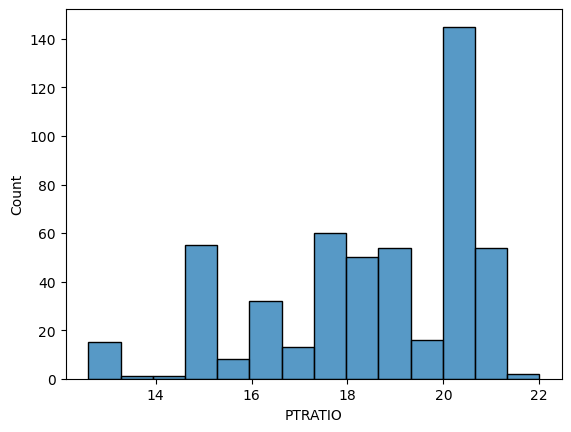

In [31]:
sns.histplot(boston_df['PTRATIO'])

# Tests

# Q1) Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [32]:
import scipy.stats
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==1]['MEDV'],boston_df[boston_df['CHAS']==0]['MEDV'])

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Null hypothesis would be median value of houses is independent of CHAS.
Alternate hypothesis would be there is relationship between MEDV and CHAS.
As the p value is smaller than alpha, we reject the null hypothesis.

# Q2) Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [35]:
m=boston_df['MEDV']
a=boston_df['AGE']
f_statistic,pvalue=scipy.stats.f_oneway(m,a)
print("F-statistic:{0}, P-value:{1}".format(f_statistic,pvalue))

F-statistic:1223.1740271875933, P-value:3.20946197250671e-176


Null hypothesis: There is no difference in median values of houses for each propotion of owner occupied units built prior to 1940.
Alternate hypothesis:There is difference in median values of houses for each propotion of owner occupied units built prior to 1940.
The p value is less than alpha therefore reject the null hypothesis.


# Q3) Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [36]:
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Null Hypothesis: There is no relationship between Nitric Oxide concentrations and propotion of non-retail business acres per town.
Alternate Hypothesis: There is relationship between Nitric Oxide concentrations and propotion of non-retail business acres per town.
Here p value is less than alpha therefore we reject the null hypothesis.

# Q4) What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [42]:
slope, intercept, r_value,p_value,std_err=scipy.stats.linregress(boston_df['DIS'],boston_df['MEDV'])
slope,intercept,r_value**2,p_value,std_err

(1.0916130158411097,
 18.390088330493384,
 0.06246437212178246,
 1.2066117273371223e-08,
 0.18837841478683107)

Null hypothesis: There is no impact of weighted distance to five Boston employment centres on the median value of owner occcupied homes.
Alternate hypothesis: The is impact of weighted distance to five Boston employment centres on the median value of owner occupied homes.
As p value is less than alpha therefore the null hypothesis is rejected.
As the coefficient is more than 0, it suggests that as the weighted distance to employment centers increases,the median home value tends to increase indicating that homes farther from employment centers might be more desirable.